In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Load the data

In [35]:
seed = 7
np.random.seed(seed)

In [36]:
data_train_path = 'C:/Users/Flore.MININT-64PJ14C/Documents/GitHub/ML_Project2/results/Split_48_0.8/Combined_All_Train_80.csv'
data_test_path = 'C:/Users/Flore.MININT-64PJ14C/Documents/GitHub/ML_Project2/results/Split_48_0.8/Combined_All_Test_80.csv'

tx_train = pd.read_csv(data_train_path,sep=",",squeeze=True)
X_train=tx_train.iloc[:, :48]
ytr = pd.read_csv(data_train_path,sep=",",usecols=[48],squeeze=True)
y_train = tf.keras.utils.to_categorical(ytr,num_classes=14)

tx_test = pd.read_csv(data_test_path,sep=",",squeeze=True)
X_test=tx_test.iloc[:, :48]
yte = pd.read_csv(data_test_path,sep=",",usecols=[48],squeeze=True)
y_test = tf.keras.utils.to_categorical(yte,num_classes=14)


In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8910, 48)
(8910, 14)
(2931, 48)
(2931, 14)


## Training

In [20]:
print(X_train.shape)
X_train=tf.expand_dims(X_train, axis=-1)
print(X_train.shape)


(8910, 48)
(8910, 48, 1)


In [21]:
print(X_test.shape)
X_test=tf.expand_dims(X_test, axis=-1)
print(X_test.shape)

(2931, 48)
(2931, 48, 1)


In [38]:
#X_train, X_test, y_train, y_test = train_test_split(x, ycat, test_size=0.2, random_state=4)
n_samples, n_features = X_train.shape[0], X_train.shape[1]
n_outputs=14

In [39]:
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D, Flatten, Dense

model = tf.keras.Sequential()
model.add(Dense(6, input_dim=48, activation='relu',kernel_initializer='zero'))
model.add(Dense(14, activation='softmax'))
    
# Compile model
optimizer = tf.keras.optimizers.Adagrad(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    

In [40]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, model):
    epochs, batch_size = 10, 100
    n_samples, n_features = X_train.shape[0], X_train.shape[1]
    n_outputs=14
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size)
    return accuracy

In [32]:
print(X_train.shape)
X_train=tf.expand_dims(X_train, axis=-1)
print(X_train.shape)


(8910, 48)
(8910, 48, 1)


In [33]:
print(X_test.shape)
X_test=tf.expand_dims(X_test, axis=-1)
print(X_test.shape)

(2931, 48)
(2931, 48, 1)


In [41]:
evaluate_model(X_train, y_train, X_test, y_test, model)

Epoch 1/10
90/90 [==============================] - 0s 983us/step - loss: 2.5777 - accuracy: 0.3603
Epoch 2/10
90/90 [==============================] - 0s 1ms/step - loss: 2.5080 - accuracy: 0.3644
Epoch 3/10
90/90 [==============================] - 0s 1ms/step - loss: 2.4634 - accuracy: 0.3644
Epoch 4/10
90/90 [==============================] - 0s 1ms/step - loss: 2.4289 - accuracy: 0.3644
Epoch 5/10
90/90 [==============================] - 0s 1ms/step - loss: 2.4006 - accuracy: 0.3644
Epoch 6/10
90/90 [==============================] - 0s 1ms/step - loss: 2.3765 - accuracy: 0.3644
Epoch 7/10
90/90 [==============================] - 0s 1ms/step - loss: 2.3554 - accuracy: 0.3644
Epoch 8/10
90/90 [==============================] - 0s 1ms/step - loss: 2.3365 - accuracy: 0.3644
Epoch 9/10
90/90 [==============================] - 0s 1ms/step - loss: 2.3198 - accuracy: 0.3644
Epoch 10/10
30/30 [==============================] - 0s 1ms/step - loss: 2.2869 - accuracy: 0.3548


0.3548277020454407

### Prediction of the model on the test set
Remark: Accuracy should be the same as the one just above

In [42]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

In [43]:
#yshape=np.zeros(14)
#Y_test=np.argmax(y_test, axis=1)#, out=yshape
acc = sum(1 for y_p, y_t in zip(y_pred, yte) if y_p == y_t)
score = acc/len(y_pred)
print('Accuracy = ', score)

Accuracy =  0.35482770385533946


In [44]:
yte = yte.astype(np.int64) # Change the variable type to match the one of the predicted 
yte.dtype

dtype('int64')

## Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix
lbs=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
cf_matrix = confusion_matrix(yte, y_pred,labels=lbs)
#print(cf_matrix)

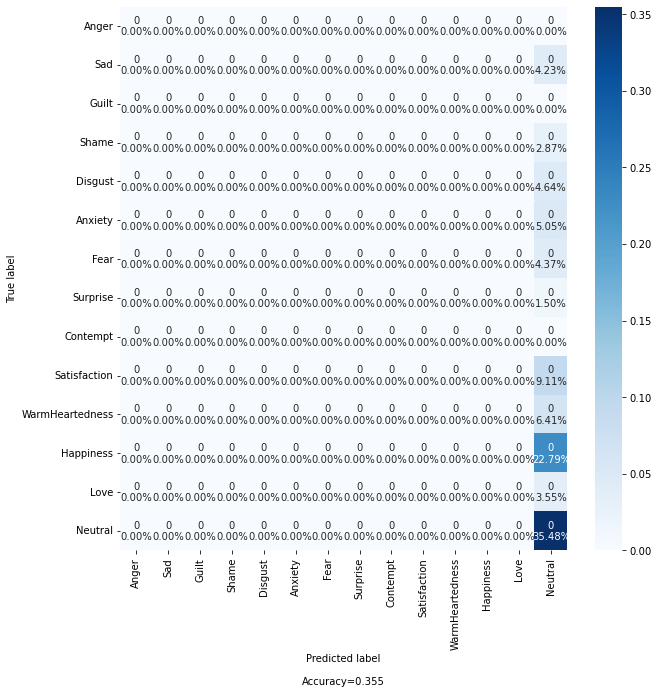

In [46]:
import seaborn as sns
from cf_matrix import make_confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

categories = ['Anger','Sad','Guilt','Shame','Disgust','Anxiety','Fear','Surprise','Contempt','Satisfaction',
            'WarmHeartedness','Happiness', 'Love', 'Neutral' ]
make_confusion_matrix(cf_matrix/np.sum(cf_matrix),
             categories=categories, cmap='Blues')

In [48]:
print(cf_matrix.sum())

2931


# To save the trained model

In [16]:
saving_path='C:/Users/manon/Desktop/Projet_2 _ML/code/models/'
name='model_cnn_split_1'
model.save(saving_path+name)

INFO:tensorflow:Assets written to: C:/Users/manon/Desktop/Projet_2 _ML/code/models/model_cnn_split_1\assets


# Plot the model

In [101]:
from tensorflow.keras.utils import plot_model#see the inputs and outputs
import graphviz
import pydot

modele = tf.keras.Sequential()
modele.add(Dense(8, input_dim=400, activation='relu'))
modele.add(Dense(14, activation='softmax'))
# Compile model
modele.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(modele,show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
